# K Vecinos Cercanos: Regresión

Para mayor información respecto al algoritmo de K Vecinos Cercanos, remitirse al notebook anterior a este.

De todas formas, como idea general, podemos decir que este algoritmo, para el caso de regresión es decir predicción de un valor numérico, funciona de la siguiente manera:

- Establecemos primero la cantidad de vecinos cercanos que tendremos en cuenta (por ej, los 3 más cercanos), siempre hablando en referencia a los valores que integrarán nuestra $X$.
- Tomamos el valor $y$ de cada uno de ellos y obtenemos un promedio, y ese promedio es el que se tomará como valor arrojado por la predicción.

## Ejemplo en Python

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Preprocesamiento de los datos

In [2]:
carros = pd.read_csv("../datos/carros.csv")
carros.shape

(39, 2)

In [3]:
carros.head()

,kms,precio
0,6048,1385956
1,11825,1297582
2,20000,1000000
3,21048,1284844
4,21549,685300


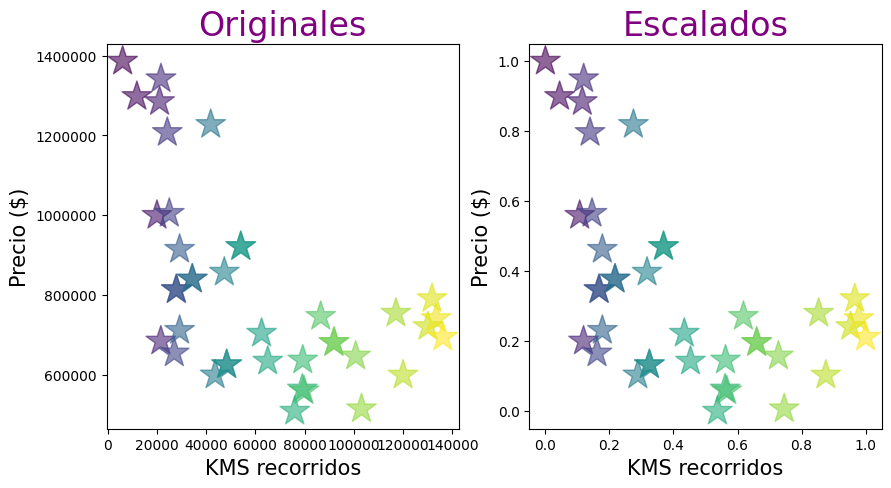

In [20]:
fig = plt.figure(figsize=(10, 5))

# Grafica de datos originales
ax = fig.add_subplot(1, 2, 1)
ax.scatter(carros["kms"], carros["precio"],
           marker="*",
           s=500,
           c=range(carros["precio"].size), alpha=0.6)
ax.set_title("Originales", size=24, color="purple")
ax.set_xlabel("KMS recorridos", size=15)
ax.set_ylabel("Precio ($)", size=15)
ax.ticklabel_format(style="plain")

# Escalamiento de los datos
escalador_kms = preprocessing.MinMaxScaler()
escalador_precio = preprocessing.MinMaxScaler()
kms = escalador_kms.fit_transform(carros["kms"].values.reshape(-1, 1))
precio = escalador_precio.fit_transform(carros["precio"].values.reshape(-1, 1))

# Grafica de datos escalados
ax = fig.add_subplot(1, 2, 2)
ax.scatter(kms, precio,
           marker="*",
           s=500,
           c=range(carros["precio"].size), alpha=0.6)
ax.set_title("Escalados", size=24, color="purple")
ax.set_xlabel("KMS recorridos", size=15)
ax.set_ylabel("Precio ($)", size=15)
ax.ticklabel_format(style="plain")

plt.show()

### Creación del modelo

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
kms.shape, precio.shape

((39, 1), (39, 1))

In [39]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(kms, precio) # datos escalados

kms_instancia = escalador_kms.transform([[20000]])
precio_instancia = knn.predict(kms_instancia) # nos va a devolver la prediccion en el rango entre 0 y 1

precio_predicho = escalador_precio.inverse_transform(precio_instancia)
print("Precio predicho: $", int(precio_predicho[0][0]))

Precio predicho: $ 990048


### Precios de carros de 0 a 140000 kms

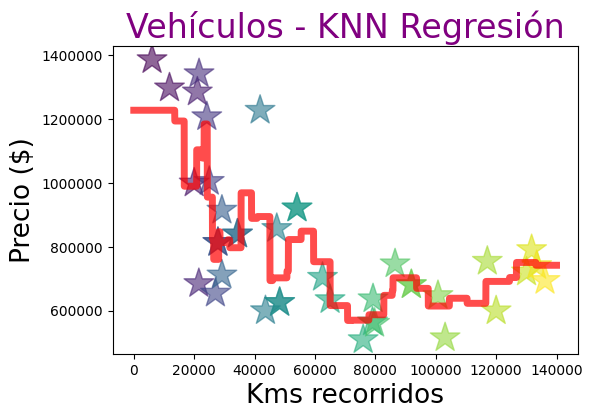

In [40]:
# Multiples regresiones de los valores dentro del rango
km_instancias = escalador_kms.transform(np.arange(0, 140000).reshape(-1, 1))
precio_instancias = knn.predict(km_instancias)
precio_predichos = escalador_precio.inverse_transform(precio_instancias)

# Grafica
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(140000), precio_predichos.reshape(1, -1)[0], 
        linewidth=5, color="red", alpha=0.7)

plt.scatter(carros["kms"], carros["precio"], marker="*",
            s=500, c=range(carros["kms"].size), alpha=0.6)

plt.title("Vehículos - KNN Regresión", size=24, color="purple")
plt.ylabel("Precio ($)", size=19)
plt.xlabel("Kms recorridos", size=19)
plt.ticklabel_format(style="plain")
plt.show()